# Solución Examen 2021 con Python

## Carga de las librerías estándar de Data Science con Python 

In [1099]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

# Preguntas del examen

## Preliminares

+ Lee el fichero de datos y crea un `data.frame` o `tibble` de R llamado `empleados`, que usaremos para el resto del examen.


In [1100]:
empleados = pd.read_csv("data/empleados.csv")
empleados.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,RateType,Rate,Education_Field
0,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,DailyRate,1463,Bachelor//Medical
1,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,HourlyRate,64,Bachelor//Medical
2,31,No,Travel_Rarely,Research_Development,23.0,Male,2,Healthcare_Representative,Very_High,Married,...,0.0,No,Outstanding,10,2,9,0,MonthlyRate,14408,Bachelor//Medical
3,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,DailyRate,874,Bachelor//Medical
4,31,Yes,Travel_Frequently,Research_Development,15.0,Male,1,Laboratory_Technician,High,Married,...,1.0,No,Excellent,2,5,2,2,HourlyRate,72,Bachelor//Medical


## Apartado 1

+ **C1: ¿Cuántas observaciones hay en la tabla? ¿Cuántas variables? ¿Hay datos ausentes? Si la respuesta a la última pregunta es afirmativa, localiza esos datos ausentes indicando en qué filas y columnas se encuentran. Después, antes de seguir adelante, elimina de la tabla las filas que contienen esos datos.**


+ La tabla tiene estas dimensiones (n. de filas, n. de variables):

In [1101]:
empleados.shape

(3528, 21)

+ Y las columnas son:

In [1102]:
empleados.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'RateType', 'Rate', 'Education_Field'],
      dtype='object')

+ Para localizar los datos ausentes hacemos:

In [1103]:
empleados_na =  empleados.isna()
empleados_na.sum()

Age                      0
Attrition                0
BusinessTravel           0
Department               0
DistanceFromHome         9
Gender                   0
JobLevel                 0
JobRole                  0
JobSatisfaction          0
MaritalStatus            0
MonthlyIncome            0
NumCompaniesWorked       6
OverTime                 0
PerformanceRating        0
TotalWorkingYears        0
TrainingTimesLastYear    0
YearsAtCompany           0
YearsInCurrentRole       0
RateType                 0
Rate                     0
Education_Field          0
dtype: int64

+ Concluimos que hay datos ausentes en las variables `DistanceFromHome` y `NumCompaniesWorked`. Para localizar en qué filas de la tabla están hacemos: 

In [1104]:
empleados.loc[empleados.DistanceFromHome.isna(), :].index

Int64Index([30, 31, 32, 897, 898, 899, 1593, 1594, 1595], dtype='int64')

In [1105]:
empleados.loc[empleados.NumCompaniesWorked.isna(), :].index

Int64Index([147, 148, 149, 1092, 1093, 1094], dtype='int64')

+ Y ahora los eliminamos:

In [1106]:
empleados.dropna(inplace=True)

+ Comprobación:

In [1107]:
np.any(empleados.isna())

False

+ **C2:
Vamos a fijarnos en las tres últimas columnas de la tabla, que son:**
    ```
    RateType,     Rate,     Education_Field
    ```  

**En particular verás que las columnas `Rate` y `RateType` incumplen una de las condiciones que definen a los conjuntos de datos limpios (*tidy*), porque la columna `Rate` mezcla los valores de más de una variable. La variable correspondiente se indica en la columna `Rate_type`.  Por otro lado, `Education_Field` incumple otra de esas condiciones, porque cada fila de esa tabla combina los valores de dos variable. En este apartado debes limpiar el conjunto de datos utilizando las herramientas del `tidyverse`. Visualiza el resultado usando `select` para que la salida del código muestre exclusivamente las variables que se han modificado en este apartado (¡cuidado, no modifiques los datos al hacer esto!**


**NOTA IMPORTANTE (2022):** este apartado estaba diseñado para usar funciones de la librería `tidyR` de R, que se había practicado en clase. Este curso no hemos visto un análogo en Python y por tanto un apartado como este no aparecería en nuestro examen para este año. Pero por si fuera de interés, incluimos aquí una solución para el apartado usando herramientas de Python. Si no quieres entretetenerte, mira como queda la tabla al final de este apartado y pasa a la siguiente pregunta

+ La parte que se refiere a separar 'Education_Field' en dos variables es relamente sencilla.

In [1108]:

empleados[['Education', 'Field']] = empleados.Education_Field.str.split('//',expand=True)
empleados[['Education_Field', 'Education', 'Field']].head()


,Education_Field,Education,Field
0,Bachelor//Medical,Bachelor,Medical
1,Bachelor//Medical,Bachelor,Medical
2,Bachelor//Medical,Bachelor,Medical
3,Bachelor//Medical,Bachelor,Medical
4,Bachelor//Medical,Bachelor,Medical


In [1109]:
empleados = empleados.drop(['Education_Field'], axis = 1)
empleados.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'RateType', 'Rate', 'Education', 'Field'],
      dtype='object')

+ En cambio la parte en la que debemos pivotar la tabla es más complicada. Obsérvese que la tabla está formada por grupos de tres filas consecutivas que se refieren siempre al mismo empleado. Por ejemplo las 15 primeras filas se refieren en realidad a 5 empleados. La única diferencia se encuentra en las columnas `RateType` y `Rate`. Veremos una selección de columnas para comprobar esto:

In [1110]:
empleados.iloc[:,[0, 1, 2, 3, 4, 18, 19]].head(15)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,RateType,Rate
0,31,No,Travel_Rarely,Research_Development,23.0,DailyRate,1463
1,31,No,Travel_Rarely,Research_Development,23.0,HourlyRate,64
2,31,No,Travel_Rarely,Research_Development,23.0,MonthlyRate,14408
3,31,Yes,Travel_Frequently,Research_Development,15.0,DailyRate,874
4,31,Yes,Travel_Frequently,Research_Development,15.0,HourlyRate,72
5,31,Yes,Travel_Frequently,Research_Development,15.0,MonthlyRate,6233
6,30,No,Non-Travel,Research_Development,2.0,DailyRate,1116
7,30,No,Non-Travel,Research_Development,2.0,HourlyRate,49
8,30,No,Non-Travel,Research_Development,2.0,MonthlyRate,7181
9,28,Yes,Non-Travel,Research_Development,24.0,DailyRate,1366


+ El número real de empleados es:

In [1111]:
len(empleados) // 3

1171

+ Vamos a añadir una columna con un identificador de empleado para facilitar el trabajo:

In [1112]:
empleados['Id'] = np.repeat(np.arange(len(empleados)// 3), 3)

+ Las columnas que se repiten para cada empleado son: 

In [1113]:
ind_columns = list(filter(lambda x:not ('Type' in x), empleados.columns))
ind_columns = list(filter(lambda x:not ('Rate' in x), ind_columns))
ind_columns

['Age',
 'Attrition',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Gender',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'OverTime',
 'PerformanceRating',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'Education',
 'Field',
 'Id']

In [1114]:
empleados[['Id', 'RateType', 'Rate']].head(15)

,Id,RateType,Rate
0,0,DailyRate,1463
1,0,HourlyRate,64
2,0,MonthlyRate,14408
3,1,DailyRate,874
4,1,HourlyRate,72
5,1,MonthlyRate,6233
6,2,DailyRate,1116
7,2,HourlyRate,49
8,2,MonthlyRate,7181
9,3,DailyRate,1366


+ Vamos a pivotar la tabla para dividir la columna 'RateType' en tres columnas correspondientes a los niveles de ese factor. Al hacerlo pandas convierte las columnas comunes en el índice (multi-índice) de la nueva tabla. El comando `reset_index` las vuelve a convertir en columnas. Como antes, inspeccionamos una selección de columnas para comprobar el resultado.

In [1115]:
empleados_wider = empleados.pivot(index = ind_columns, columns='RateType', values ='Rate').reset_index().sort_values('Id')
empleados_wider.rename_axis(columns = 'indx', inplace=True)
empleados_wider.iloc[:,[0, 1, 2, 3, 4, 18, 20, 21, 22]].head(15)

indx,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Id,DailyRate,HourlyRate
339,31,No,Travel_Rarely,Research_Development,23.0,Bachelor,0,1463,64
353,31,Yes,Travel_Frequently,Research_Development,15.0,Bachelor,1,874,72
258,30,No,Non-Travel,Research_Development,2.0,Bachelor,2,1116,49
188,28,Yes,Non-Travel,Research_Development,24.0,College,3,1366,72
394,32,No,Travel_Rarely,Sales,8.0,Bachelor,4,604,56
1039,50,No,Travel_Rarely,Research_Development,7.0,College,5,989,43
659,37,No,Travel_Rarely,Research_Development,10.0,Master,6,1305,49
832,41,No,Travel_Rarely,Sales,23.0,College,7,1206,80
435,33,No,Travel_Rarely,Research_Development,13.0,Below_College,8,461,53
517,34,Yes,Non-Travel,Sales,19.0,Bachelor,9,1362,67


+ Hacemos un nuevo `reset_index` para eliminar los valores ahora superfluos del índice y también eliminamos la variable 'Id' porque sus valores son los de ese segundo nuevo índice.

In [1116]:
empleados = empleados_wider.reset_index(drop=True).drop('Id', axis=1)
empleados.iloc[:,[0, 1, 2, 3, 4, 18, 20, 21, 22]].head(15)


indx,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,DailyRate,HourlyRate,MonthlyRate
0,31,No,Travel_Rarely,Research_Development,23.0,Bachelor,1463,64,14408
1,31,Yes,Travel_Frequently,Research_Development,15.0,Bachelor,874,72,6233
2,30,No,Non-Travel,Research_Development,2.0,Bachelor,1116,49,7181
3,28,Yes,Non-Travel,Research_Development,24.0,College,1366,72,12355
4,32,No,Travel_Rarely,Sales,8.0,Bachelor,604,56,11693
5,50,No,Travel_Rarely,Research_Development,7.0,College,989,43,16701
6,37,No,Travel_Rarely,Research_Development,10.0,Master,1305,49,21123
7,41,No,Travel_Rarely,Sales,23.0,College,1206,80,11591
8,33,No,Travel_Rarely,Research_Development,13.0,Below_College,461,53,17241
9,34,Yes,Non-Travel,Sales,19.0,Bachelor,1362,67,4652


+ **C3: Una vez limpios los datos: ¿de qué tipo son las variables del conjunto de datos? Usa la función `mutate_if` de `dplyr` (o alternativamente usa `across`) para asegurarte de que todas las variables de esta tabla que se han leído como `character` se convierten en factores. Mira la ayuda de `mutate_if` para hacer esto si lo necesitas. Después haz una lista de variables cuantitativas y otra de variables cualitativas (factores). ¿Cuáles, dentro de estas últimas, son factores ordenados (no es necesario incluir el orden en el proceso de transformación de estos factores)?**



+ Los tipos de las variables se pueden averiguar con:

In [1117]:
empleados.dtypes

indx
Age                        int64
Attrition                 object
BusinessTravel            object
Department                object
DistanceFromHome         float64
Gender                    object
JobLevel                   int64
JobRole                   object
JobSatisfaction           object
MaritalStatus             object
MonthlyIncome              int64
NumCompaniesWorked       float64
OverTime                  object
PerformanceRating         object
TotalWorkingYears          int64
TrainingTimesLastYear      int64
YearsAtCompany             int64
YearsInCurrentRole         int64
Education                 object
Field                     object
DailyRate                  int64
HourlyRate                 int64
MonthlyRate                int64
dtype: object

+ Todas las variables de tipo `object` corresponden en realidad a factores.

In [1118]:
empleados.columns[empleados.dtypes == 'object']

Index(['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating',
       'Education', 'Field'],
      dtype='object', name='indx')

+ El resto son numéricas:

In [1119]:
empleados.columns[empleados.dtypes != 'object']

Index(['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'DailyRate', 'HourlyRate',
       'MonthlyRate'],
      dtype='object', name='indx')

+ Convertimos las de tipo `object` a `category`:

In [1120]:
empleados_objects = empleados.columns[empleados.dtypes == 'object']
empleados[empleados_objects] = empleados[empleados_objects].astype('category', )

+ Dentro de esos factores, los ordenados son `JobSatisfaction`, `PerformanceRating` y `Education`

## Apartado 2

+ **C4: Representa gráficamente la distribución de la variable edad `Age` mediante un histograma con la curva de densidad de la variable superpuesta. Recuerda que en este y otros apartados se valorará positivamente el uso de ggplot. Representa también un boxplot de la variable edad. Opcionalmente puedes usar un violinpot o añadir los puntos de la muestra (asegúrate en ese caso de que no impiden ver el boxplot).** 


+ El gráfico histograma + densidad se obtiene con:

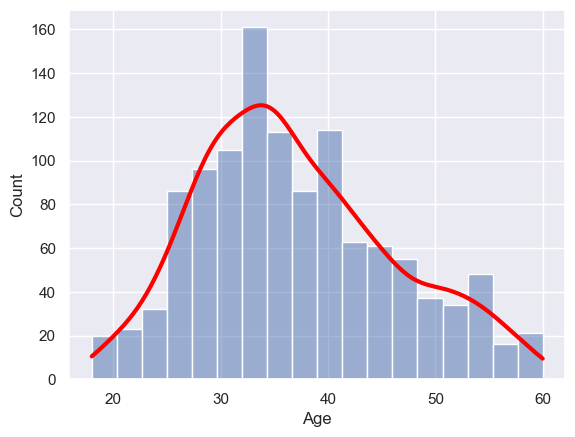

In [1121]:
dens_plot = sns.histplot(data = empleados, x = 'Age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)


+ Aquí dejamos como ejercicio elegir los subintervalos de edad del histograma. Podemos dibujar un boxplot, con violinplot y puntos de la muestra superpuestos así:

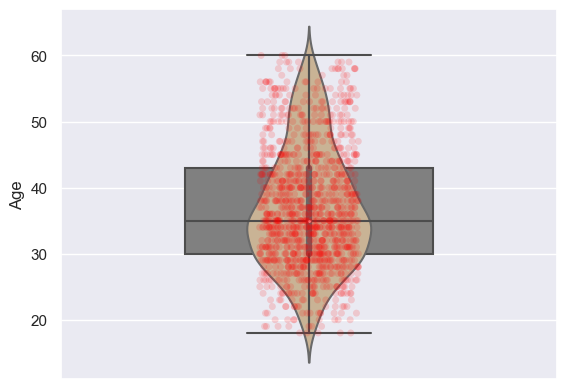

In [1122]:
sns.violinplot(y= empleados.Age, alpha = 0.3, color = "tan", width=0.25)
sns.stripplot(y='Age', data=empleados, color="red", alpha = 0.15, jitter=0.1)
sns.boxplot(y= empleados.Age, width=0.5, color = "gray")
plt.show()

+ **C5: Estudia gráficamente (por ejemplo con boxplots) la relación entre la variable `Age` y la variable `Attrition`. ¿Influye el género en esa relación? Usa los recursos gráficos de ggplot para discutir la respuesta, lo que se busca es un juicio inicial basado en una  exploración gráfica.**

+ El siguiente gráfico de boxplots paralelos por niveles muestra que el valor de `Age` es más bajo entre aquellos empleados para los que `Attrition` es `Yes`. Es decir, que los empleados de menor edad tienen más probabilidad de dejar la compañía. Pero no podemos deducir a partir de este gráfico si esa diferencia de edad entre los dos grupos es significativa.

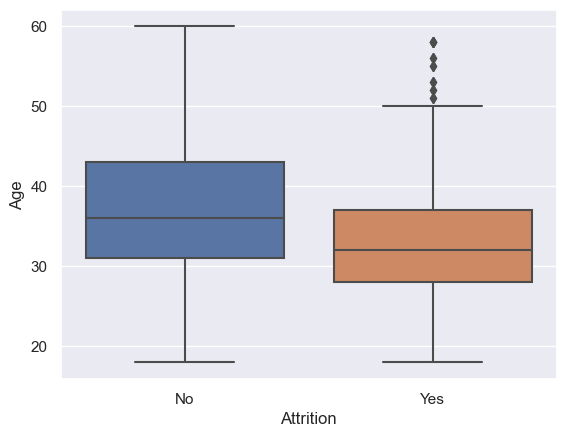

In [1123]:
sns.boxplot(x='Attrition', y='Age', data=empleados)
plt.show()

+ Para estudiar gráficamente el posible efecto del género en esta relación usamos el argumento `hue`. Los boxplots paralelos en este caso muestran que la diferencia de edad entre los dos grupos es, en el caso de las mujeres, más acusada que en general.  

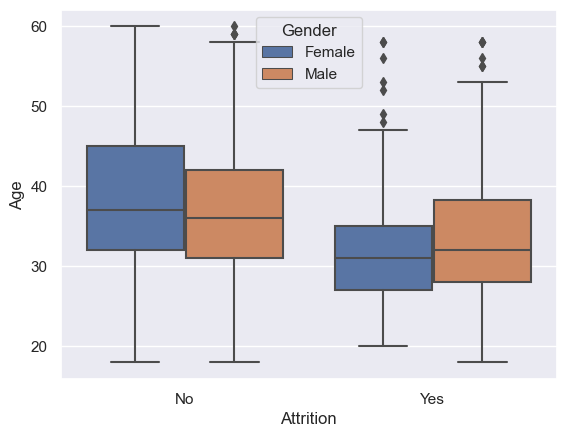

In [1124]:
sns.boxplot(x='Attrition', y='Age', hue='Gender', data=empleados)
plt.show()

+ **C6: Haz la tabla de frecuencias absolutas del factor `JobSatisfaction`. Después haz una representación gráfica adecuada de esa tabla. Opcionales:** 
    - **juega con los argumentos `fill` y `position` de `ggplot` para incorporar al gráfico la información de `Attrition` mediante colores.** 
    - **ten en cuenta que `JobSatisfaction` es un factor ordenado y trata de incorporar esa ordenación a la representación gráfica. Indicación: usa la función `factor` y sus argumentos `levels` y `ordered` para esto.**

+ Para hacer que Python tenga en cuenta el orden de `JobSatisfaction` recodificamos esa variable como factor ordenado:

In [1125]:
satisfaction_order = ['Low', 'Medium', 'High', 'Very_High']
empleados.JobSatisfaction = pd.Categorical(empleados.JobSatisfaction, 
                                           categories=satisfaction_order, ordered=True)

+ La tabla de frecuencias absolutas de `JobSatisfaction` es (usamos `sort_index` para que Python tenga ne cuenta ese orden de `JobSatisfaction`):

In [1126]:
absFreq_JobSatisfaction = empleados.JobSatisfaction.value_counts().sort_index(ascending=True)
absFreq_JobSatisfaction

Low          231
Medium       219
High         352
Very_High    369
Name: JobSatisfaction, dtype: int64

+ Y en un diagrama de barras:

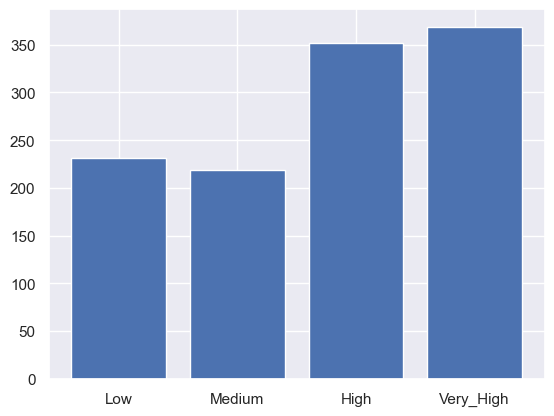

In [1127]:
plt.bar(x = satisfaction_order, height=absFreq_JobSatisfaction)
plt.show()

+ Para las partes opcionales de este apartado empezamos creando una tabla crusada de `JobSatisfaction` y `Attrition`.

In [1128]:
CT = pd.crosstab(empleados.JobSatisfaction, empleados.Attrition)
CT

Attrition,No,Yes
JobSatisfaction,,
Low,178,53
Medium,185,34
High,297,55
Very_High,330,39


In [1129]:
# We add to the table the totals for each row
CT['total'] = CT.sum(axis=1)
# Sort the table using those totals
CT.sort_values('total', inplace=True)
# Remove them so thay do not interfere with the graphic
CT2= CT.drop(columns=['total']).sort_index()
CT2

Attrition,No,Yes
JobSatisfaction,,
Low,178,53
Medium,185,34
High,297,55
Very_High,330,39


+ Y usamos esa información como se ilustró en la Sesión 7 para incorporarla al gráfico de barras: 

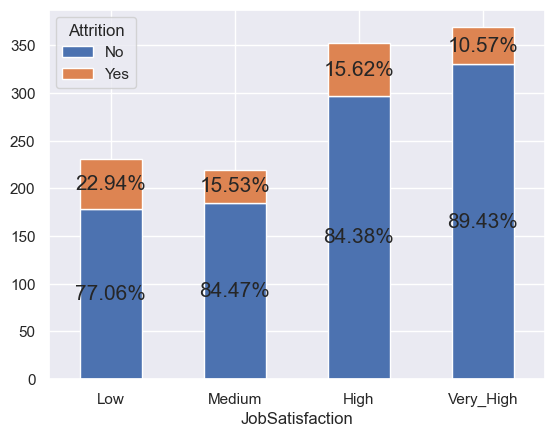

In [1130]:
percents = CT2.div(CT.total, axis = 0).mul(100).round(2)

percents.iloc[:, 0]

ax = CT2.plot.bar(stacked = True, rot = 0)

for i in range(len(ax.containers)):
    
    c = ax.containers[i]  
    # percent labels (or empty string below a threshold for close to 0%)
    labels = [f'{v:2.2f}%' if (v > 1) else '' for v in percents.iloc[:, i]]  
    # add labels to bars
    ax.bar_label(c, labels=labels, label_type='center',   fontsize=15)


plt.show() 

## Apartado 3

+ **C7: Calcula la mediana del salario mensual para cada departamento y cada nivel dentro de ese departamento. Ordena la respuesta de mayor a menor y asegúrate de que en la tabla de salida se muestran las columnas relevantes.** 

+ Es una aplicación directa de `groupby`:

In [1131]:
empleados.groupby(['Department','JobLevel']).MonthlyIncome.median().sort_values(ascending= False)

Department            JobLevel
Research_Development  5           19326.0
Human_Resources       5           19189.0
Sales                 5           19068.0
Human_Resources       4           16799.0
Research_Development  4           16413.0
Sales                 4           15427.0
Research_Development  3           10293.0
Human_Resources       3            9756.0
Sales                 3            9419.0
Human_Resources       2            5910.0
Sales                 2            5396.0
Research_Development  2            5238.0
Human_Resources       1            2706.0
Research_Development  1            2700.0
Sales                 1            2575.5
Name: MonthlyIncome, dtype: float64

+ **C8: Si elegimos al azar un empleado cuyo nivel de satisfacción en el trabajo `JobSatisfaction` es `VeryHigh`, calcula la probabilidad de que sea soltero. Si elegimos un empleado de la empresa al azar ¿cuál es la probabilidad de que sea una mujer que lleva más de cinco años en la empresa?**


+ Para calcular la primera probabilidad (condicionada) seleccionamos con la condición impuesta y hacemos una tabla de frecuencias relativas:

In [1132]:
empleados.loc[empleados.JobSatisfaction == "Very_High"]["MaritalStatus"].value_counts(normalize = True)

Married     0.425474
Single      0.355014
Divorced    0.219512
Name: MaritalStatus, dtype: float64

+ La probabilidad pedida (soltero con JobSatisfaction == "Very_High") es el segundo valor de esta tabla.

+ Para la segunda probabilidad pedida (una intersección) simplemente dividimos el número de registros que cumplen ambas condiciones por el número total de empleados.

In [1133]:
len(empleados.loc[(empleados.Gender == "Female") & (empleados.YearsAtCompany > 5)]) / len(empleados)

0.19726729291204098

+ **C9: Si elegimos 12 empleados de esta compañía al azar y con remplezamiento, ¿cuál es la probabilidad
de que 4 de ellos hayan trabajado en 3 o más compañías (NumCompaniesWorked)?**

+ Puesto que el muestreo es con remplazamiento, es una binomial, con $n = 12$ y probabilidad $p$ que se calcula así:

In [1134]:
p_binom = np.mean(empleados['NumCompaniesWorked'] >= 3)
p_binom

0.41417591801878734

+ Ahora ya podemos calcular con la binomial $X\sim B(n, p)$ la respuesta $P(X = 4)$

In [1135]:
stats.binom.pmf(4, n = 12, p = p_binom)

0.2020609256259767

+ **C10: Haz una tabla de contingencia (dos por dos) de `Attrition` frente a `Overtime`, la variable que nos dice si un empleado hace o no horas extras. Supongamos que queremos usar `Overtime` como una especie de *prueba diagnóstica* de los valores de `Attrition`, equiparando enfermo/sano con `Attrition` Yes/No y test positivo/negativo con `Overtime` Yes/No. ¿Cuál es la tasa de falsos positivos de este test? ¿Cuál es la precisión del test? Opcional: ¿cuáles son su sensibilidad y especificidad?**

+ La tabla de contingencia pedida es:

In [1136]:
CT = pd.crosstab(empleados.Attrition, empleados.OverTime)
CT

OverTime,No,Yes
Attrition,,
No,765,225
Yes,83,98


+ Para facilitar las operaciones convertimos la tabla a un array de NumPy:

In [1137]:
CT_np = CT.to_numpy()
CT_np

array([[765, 225],
       [ 83,  98]])

+ La tasa de falsos positivos se puede calcular sobre el total o, a menudo, sobre los negativos reales. En el primer caso sería:

In [1138]:
FP = CT_np[0, 1] / CT_np.sum()
FP


0.19214346712211786

+ En el segundo sería:

In [1139]:
CT_np[0, 1] / CT_np[0,:].sum()

0.22727272727272727

+ Para la precisión debemos sumar la diagonal (TP + TN) y dividir por el total:

In [1140]:
precision = np.diagonal(CT_np).sum() / CT_np.sum()
precision

0.7369769427839453

+ **C11: Asumiendo la normalidad de los datos, calcula un intervalo de confianza al 95% para la edad medio de los empleados del departamento más numeroso de la empresa. Opcional: ¿crees que está justificada la hipótesis de normalidad de esos datos?**

+ Primero localizamos el departamento más numeroso con:

In [1141]:
empleados['Department'].value_counts(sort= True)

Research_Development    771
Sales                   350
Human_Resources          50
Name: Department, dtype: int64

+ Es `Research_Development`. Podemos calcular un intervalo de confianza a mano así:

In [1142]:
RD_Age = empleados.loc[empleados.Department == 'Research_Development']['Age']
data = RD_Age
# Compute the necessary sample values
n = data.size
dof = n - 1

barX = data.mean()
s = data.std()

# Critical point computation with the Student's t:
cl = 0.95
alpha = 1 - cl
crit_point = stats.t.isf(alpha/2, df = n - 1, loc = 0, scale = 1)

# Formula for the confidence interval
conf_int = barX + np.array([-1, 1]) * crit_point * s / np.sqrt(n)
print("The confidence interval is [{:.4}, {:.4}]".format(conf_int[0], conf_int[1]))

The confidence interval is [36.43, 37.71]


+ O con `stats` así:

In [1143]:
stats.t.interval(alpha=0.95, df=len(RD_Age)-1, loc=np.mean(RD_Age), scale=stats.sem(RD_Age))

(36.42508362672136, 37.71240016056788)

+ Si hemos considerado que el tamaño de la muestra es suficientemente grande como para usar la normal en lugar de la $t$ de Student, obtendremos:

In [1144]:
stats.norm.interval(alpha=0.95, loc=np.mean(RD_Age), scale=stats.sem(RD_Age))

(36.42609536696152, 37.71138842032772)

+ Para verificar la normalidad de la muestra podemos usar un qq-plot. En este caso con una muestra de este tamaño, la desviación de la normalidad que se aprecia en las colas parece significativa.

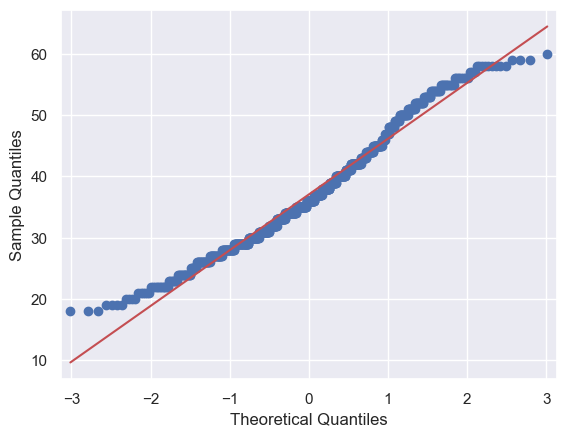

In [1145]:
sm.qqplot(RD_Age, line="s")
plt.show()

+ Formalmente disponemos del contraste de Shapiro-Wilk, cuya hipótesis nula es "la muestra procede de una población normal" y cuyo p-valor podemos calcular en Python con:

In [1146]:
shap_wilk = stats.shapiro(RD_Age)
shap_wilk.pvalue

8.753747726686356e-10

+ Esto nos lleva a rechazar la hipótesis nula y confirmar las sospechas de que la normalidad de la muestra no está garantizada. 

+ **C12: Toma una muestra aleatoria y con remplazamiento de 20 empleados del departamento de ventas y haz un contraste (al 95% de significación) de la *hipótesis nula:* la distancia media a su domicilio es de 9 km. Asegúrate de mantener el comando `set.seed` como primera línea de tu respuesta en este apartado para garantizar la reproducibilidad.**


+ Se puede realizar con `ttest_1_samp` de `stats`.

In [1147]:
sales_sample = empleados.loc[empleados.Department == 'Sales'].sample(n = 20, random_state=2022)

stats.ttest_1samp(sales_sample.DistanceFromHome, popmean=9, alternative="two-sided")

Ttest_1sampResult(statistic=0.2660722172015492, pvalue=0.7930494826790722)

+ El p-valor es muy grande, asi que **no** rechazamos la hipótesis nula. 

+ **C13:  Considerando los empleados del departamento *Research_Development* vamos a hacer un modelo de regresión lineal para las dos variables:  
$x:$ YearsAtCompany
$y:$ MonthlyIncome  
Construye el modelo usando la función `lm` y además dibuja el diagrama de dispersión de esas variables junto con la recta de regresión obtenida. ¿Qué porcentaje de la variabilidad en el salario mensual se explica con el modelo? ¿Cuánto se incrementa el salario mensual de un empleado de ese departamento por cada año de antigüedad en la empresa?**

+ La forma más cómoda de obtener el modelo de regresión es usando `statsmodels`,  como hemos visto:

In [1148]:
RD = empleados.loc[empleados.Department == 'Research_Development']
X = sm.add_constant(RD.YearsAtCompany)
Y = RD.MonthlyIncome
model_RD = sm.OLS(Y, X)
RD_fit = model_RD.fit()
RD_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 02 Oct 2022   Prob (F-statistic):           4.09e-47
Time:                        18:00:17   Log-Likelihood:                -7533.1
No. Observations:                 771   AIC:                         1.507e+04
Df Residuals:                     769   BIC:                         1.508e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3599.4544    230.998     15.582      0.000    3145.992    4052.917
YearsAtCompany   386.9214     25.038     15.453      0.000     337.770     436.073
==============================================================================
Omnibus:                      204.854   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              429.793
Skew:                           1.482   Prob(JB):                     4.70e-94
Kurtosis:                       5.142   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ La tabla anterior muestra que el porcentaje de variabilidad explicado por el modelo es (en tanto por uno):

In [1149]:
RD_fit.rsquared

0.23694971973611856

+ Por lo que el modelo no parece estar ajustándose bien a los datos. 

+ El incremento del salario mensual de un empleado de ese departamento por cada año de antigüedad en la empresa es el coeficiente de `YearsAtCompany`, es decir:

In [1150]:
RD_fit.params[1]

386.92139382322625

+ Para obtener una representación gráfica:

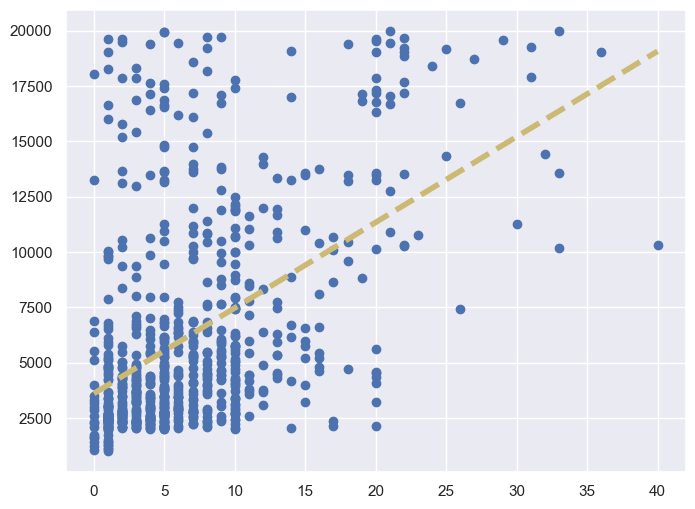

In [1151]:
X_new = np.linspace(X.min(), X.max(), 100)
X_new = sm.add_constant(X_new)
RD_fit.pred = RD_fit.get_prediction(X_new)
RD_fit_fitted_new = RD_fit.pred.summary_frame(alpha=0.05)["mean"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X.iloc[:,1], Y, "o", label="data")
ax.plot(X_new[:,1], RD_fit_fitted_new, "y--", lw = 4)
